In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import LabelEncoder

In [3]:
Iris=pd.read_csv('/content/IRIS.csv')

In [5]:
Iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
x=Iris.drop("species",axis=1)
y=Iris["species"]

In [8]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
y

,species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [10]:
le=LabelEncoder()
y_encoded=le.fit_transform(y)

In [11]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
model=DecisionTreeClassifier(random_state=42)
model.fit(train_x,train_y)

DecisionTreeClassifier(random_state=42)

In [13]:
y_pred = model.predict(test_x)
accuracy_score(test_y, y_pred)
classification_report(test_y, y_pred, target_names=le.classes_)

'                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00        10\nIris-versicolor       1.00      1.00      1.00         9\n Iris-virginica       1.00      1.00      1.00        11\n\n       accuracy                           1.00        30\n      macro avg       1.00      1.00      1.00        30\n   weighted avg       1.00      1.00      1.00        30\n'

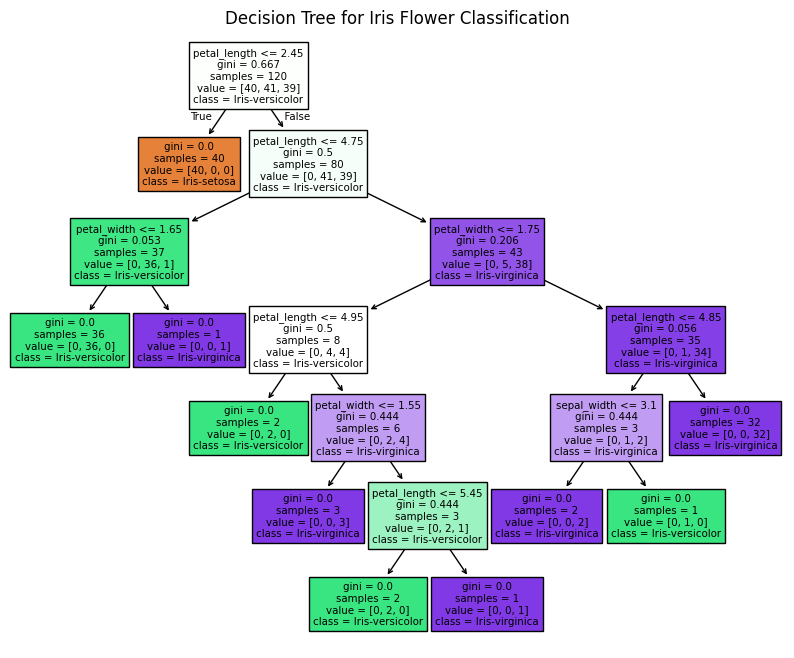

In [17]:
plt.figure(figsize=(10, 8))
plot_tree(model, feature_names=Iris.columns[:-1], class_names=le.classes_, filled=True)
plt.title("Decision Tree for Iris Flower Classification")
plt.show()